In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta Method

## Second-Order Runge-Kutta (RK2)


So far we have encountered differential equations of the form 
    $$\frac{dx}{dt} = f(x,t)$$
We examine the Taylor expansion of $x(t+h)$ around $t + \frac12 h$
\
\
    \begin{align*}
        x(t+h) &= x\left(t + \frac12 h\right) + \frac{dx}{dt}\Big|_{t+ \frac12 h} \left(t + h - (t + \frac12 h)\right) + \frac12\frac{d^2x}{dt^2}\Big|_{t+ \frac12 h} \left(t + h - (t + \frac12 h)\right)^2 + \mathcal{O}(h^3)\\ 
               &= x\left(t + \frac12 h\right) + \frac12 h \left(\frac{dx}{dt}\right)_{t+ \frac12 h} + \frac18 h^2 \left(\frac{d^2x}{dt^2}\right)_{t+ \frac12 h} + \mathcal{O}(h^3)
    \end{align*}
\
\
Taylor expanding for $x(t)$ around $t + \frac12 h$
    \begin{align*}
        x(t) &= x\left(t + \frac12 h\right) + \frac{dx}{dt}\Big|_{t+ \frac12 h} \left(t - (t + \frac12 h)\right) + \frac12\frac{d^2x}{dt^2}\Big|_{t+ \frac12 h} \left(t - (t + \frac12 h)\right)^2 + \mathcal{O}(h^3)\\ 
            &= x\left(t + \frac12 h\right) - \frac12 h \frac{dx}{dt}\Big|_{t+ \frac12 h} + \frac18 h^2\frac{d^2x}{dt^2}\Big|_{t+ \frac12 h} + \mathcal{O}(h^3)\\ 
    \end{align*}
\
\
Subtracting $x(t)$ from $x(t + h)$:
\
\
    \begin{align*}
        x(t+h) - x(t) = h \frac{dx}{dt}\Big|_{t+ \frac12 h} + \mathcal{O}(h^3)
    \end{align*}
\
\
We recall that $\frac{dx}{dt} = f(x(t),t)$. So, 
\
\
    \begin{align*}
        x(t+h) = x(t) + h f\left(x\left(t+ \frac12 h\right),t+ \frac12 h\right) + \mathcal{O}(h^3)
    \end{align*}
\
\
The error term is $\mathcal{O}(h^3)$. We set 
    \begin{align*}
        k_1 &= hf(x,t)\\
        k_2 &= hf\left(x + \frac12 k_1, t + \frac12 h\right)
    \end{align*}
\
\
So that
\
\
    \begin{align}
        x(t+h) &= x(t) + k_2
    \end{align}

In [2]:
def rk2(f, x0, t):
    '''
    f: function
    x0: initial condition
    t: grid of evenly-spaced t-values
    '''
    
    a = t[0]
    b = t[-1]
    h = (b - a) / len(t) # stepsize
    
    # Instantiate a new array
    x = np.zeros(len(t))
    x[0] = x0 # Plugs initial condition
    
    for j in range(0, len(t)-1):
        k1 = h*f(x[j], t[j])
        k2 = h*f(x[j] + 0.5*k1, t[j] + 0.5*h)
        x[j + 1] = x[j] + k2
    
    return x

# Sanity check

<IPython.core.display.Javascript object>


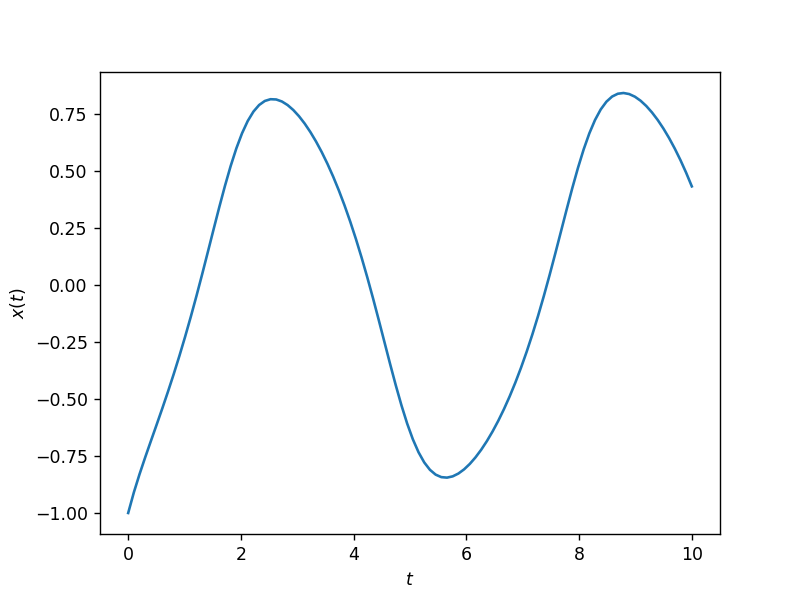

Text(0, 0.5, '$x(t)$')

In [3]:
f = lambda x,t: -x**3 + np.sin(t)

a = 0
b = 10
N = 100
t = np.linspace(a,b,N)

x0 = -1
x = rk2(f, x0, t)

plt.figure()
plt.plot(t,x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

# Fourth Order Runge-Kutta

In [4]:
def rk4(f, x0, t):
    '''
    f: function
    x0: initial condition
    t: grid of evenly-spaced t-values
    '''
    
    a = t[0]
    b = t[-1]
    h = (b - a) / len(t) # stepsize
    
    # Instantiate a new array
    x = np.zeros(len(t))
    x[0] = x0 # Plugs initial condition
    
    for j in range(0, len(t)-1):
        k1 = h*f(x[j], t[j])
        k2 = h*f(x[j] + 0.5*k1, t[j] + 0.5*h)
        k3 = h*f(x[j] + 0.5*k2, t[j] + 0.5*h)
        k4 = h*f(x[j] + k3, t[j] + h)
        x[j + 1] = x[j] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x

# Sanity Check

<IPython.core.display.Javascript object>


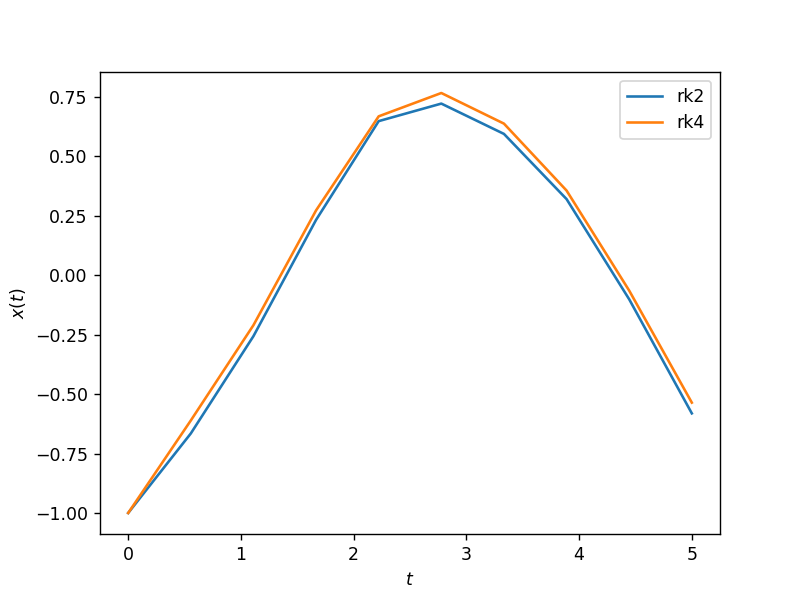

In [10]:
f = lambda x,t: -x**3 + np.sin(t)

a = 0
b = 5
N = 10
t = np.linspace(a,b,N)

x0 = -1 # Initial condition

x2 = rk2(f, x0, t)
x3 = rk4(f, x0, t)


plt.figure()
plt.plot(t,x2, label='rk2')
plt.plot(t,x3, label='rk4')
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.legend()